<a href="https://colab.research.google.com/github/ivyyyyyliu/Project-2-/blob/main/Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LiPing Liu

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
file1 = '/content/drive/MyDrive/07 Week 7: Classification/Project 2/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Deleted duplicate rows.

In [40]:
df.duplicated().sum()
#checking if there is any duplicate 

0

- Identified and addressed missing values.

In [41]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [42]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)
df.isna().sum()
#cause the missing values are in the a numeric column and float so I decided to fill with average/mean of bmi.

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [43]:
df['gender'].value_counts()
#there is one 'other', I would drop this one cause it does not really help to understand the data.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [44]:
df[df['gender'] == 'Other']
#in row3116

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [45]:
df=df.drop(index=[3116])

In [46]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [47]:
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [48]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [49]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [50]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

- Produced univariate visuals for the target and all features.

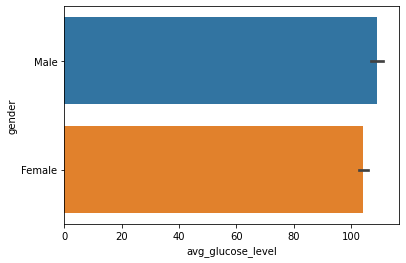

In [51]:
sns.barplot(data=df, y='gender', x='avg_glucose_level');

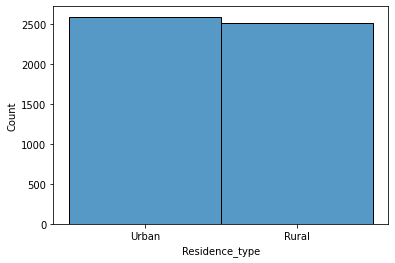

In [52]:
# Use Histogram to look at dictribution of Literacy Rates
sns.histplot(data=df, x='Residence_type');

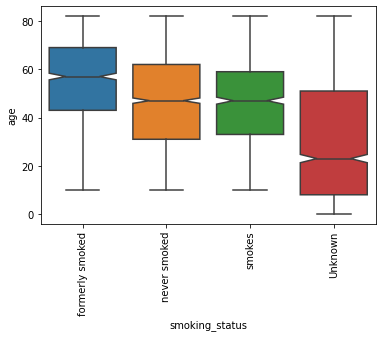

In [53]:
#boxplot with seaborn
sns.boxplot(data=df, y='age', x='smoking_status', notch=True);
plt.xticks(rotation = 90);

- Identified outliers.

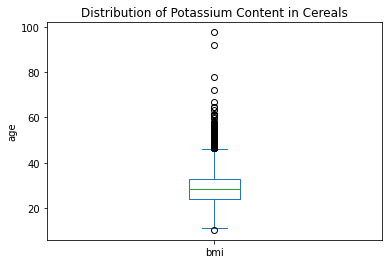

In [54]:
df['bmi'].plot(kind='box')
plt.title('Distribution of Potassium Content in Cereals')
plt.ylabel('age');
#plt.show()

correlations

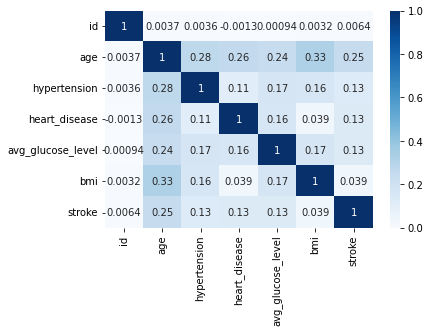

In [55]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True);

The only higher correlation I can found here is between Age and BMI. It is highest of all.  

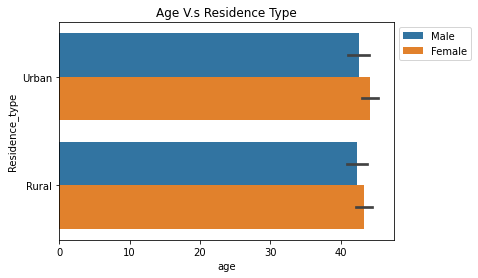

In [59]:
sns.barplot(data = df, x = 'age', y = 'Residence_type', hue = 'gender')
plt.title('Age V.s Residence Type')
plt.legend(bbox_to_anchor=(1,1));

In this Data, Female are generally olrder than male. In Urban and Rural, they have more female more than male.

In [65]:
smoke_bmi = df.groupby('smoking_status')['bmi'].mean()
smoke_bmi

smoking_status
Unknown            25.793839
formerly smoked    30.655968
never smoked       29.959529
smokes             30.434789
Name: bmi, dtype: float64

In [77]:
counts = df.groupby(['smoking_status'])['bmi'].nunique()
counts

smoking_status
Unknown            327
formerly smoked    271
never smoked       335
smokes             260
Name: bmi, dtype: int64

In [78]:
smoking = list(counts.index)
smoking

['Unknown', 'formerly smoked', 'never smoked', 'smokes']

Text(0.5, 1.0, 'Average Salaries by International Currency')

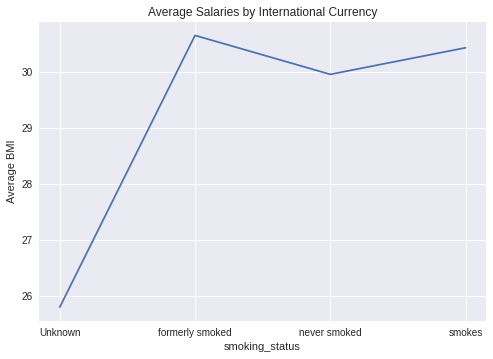

In [79]:
plt.style.use('seaborn')
plt.plot(smoking, smoke_bmi);
plt.xlabel('smoking_status')
plt.ylabel('Average BMI');
plt.title('Average Salaries by International Currency')

people who formerly smoked and smokes has higher BMI than people who nenver smoked. 